In [8]:
import pandas as pd
df = pd.read_csv('../data/raw/creditcard.csv')
X = df.drop(columns=['Class'])
y = df['Class']

In [9]:
# Train/Test Split

# Separate features and target
X = df.drop(columns=['Class'])
y = df['Class']


In [10]:
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


Why stratify?

Preserves fraud ratio in both sets

Essential for imbalanced datasets

In [9]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (227845, 30)
X_test shape: (56962, 30)


In [ ]:
# Apply balancing ONLY on training data

print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [ ]:
# scaling your features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# verifying the results
print(X_train_scaled.mean(axis=0)) # Should be near 0
print(X_train_scaled.std(axis=0))  # Should be near 1

[-1.40957808e-16 -7.48448536e-19 -3.99172552e-18  5.86284686e-18
 -1.24741423e-18 -1.29731079e-17  2.86905272e-18  1.24741423e-17
 -5.61336402e-18 -2.91894929e-17 -7.23500251e-18 -1.43140782e-17
  2.37008703e-18  6.86077824e-18 -1.87112134e-17 -1.98338862e-17
 -3.49275983e-18 -7.73396820e-18 -1.19128059e-17  1.69648335e-17
  4.74017406e-18 -4.80254477e-18  8.48241674e-18 -1.62163849e-18
  1.32225908e-17 -1.61540142e-17 -1.37215565e-18 -1.18504351e-18
 -6.86077824e-18  3.74224268e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
# Train Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

lr.fit(X_train, y_train)


c:\Users\bia\Desktop\week-5\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:

Baseline Model (Logistic Regression)
Logistic Regression was trained as a baseline model to establish a performance reference for fraud detection. Due to the severe class imbalance and the non-linear nature of fraud patterns, the model performed poorly, achieving a fraud recall of only 0.02. This confirms that linear models are insufficient for capturing complex fraud behaviors, motivating the use of ensemble methods.

In [ ]:
Model Status
The output shows the LogisticRegression object with its parameters (like class_weight='balanced'). This indicates the training process is complete.


In [16]:
# Making predictions

y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:, 1]


c:\Users\bia\Desktop\week-5\.venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\bia\Desktop\week-5\.venv\Lib\site-packages\sklearn\utils\validation.py:2684: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [17]:
# Evaluating properly

from sklearn.metrics import classification_report, roc_auc_score

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.02      0.02      0.02        98

    accuracy                           1.00     56962
   macro avg       0.51      0.51      0.51     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.5108949530853422


Model Performance SummaryThe model is currently performing very poorly on the fraud class (Class 1), with results only slightly better than random guessing ($ROC-AUC \approx 0.51$).

Overall Accuracy: 1.00 ROC-AUC Score: 0.5109

Analysis
Low Recall (0.02): The model is only catching 2% of actual fraud cases.
Low Precision (0.02): When the model predicts fraud, it is wrong 98% of the time.
Imbalance: The high accuracy (1.00) is misleading because the dataset is dominated by Class 0.

In [18]:
# Advanced Models 

# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [19]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb.fit(X_train, y_train)


,"loss loss: {'log_loss', 'exponential'}, default='log_loss'The loss function to be optimized. 'log_loss' refers to binomial andmultinomial deviance, the same as used in logistic regression.It is a good choice for classification with probabilistic outputs.For loss 'exponential', gradient boosting recovers the AdaBoost algorithm.",'log_loss'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.For an example of the effects of this parameter and its interaction with``subsample``, see:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_regularization.py`.",0.05
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",200
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are'friedman_mse' for the mean squared error with improvement score byFriedman, 'squared_error' for mean squared error. The default value of'friedman_mse' is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``,

In [20]:
# To see if the Random Forest performed better than the Logistic Regression

y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962



Random Forest Performance Summary
The Random Forest model performed significantly better than the Logistic Regression model.
Overall Accuracy: 1.00

Key Improvements
Recall (0.82): You are now catching 82% of fraud cases (up from 2%).
Precision (0.81): When the model flags fraud, it is correct 81% of the time (up from 2%).
F1-Score (0.81): A strong balance between precision and recall for the minority class.

In [ ]:
# evaluating gradient boosting model

y_pred_gb = gb.predict(X_test)
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.87      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962



The Gradient Boosting model shows higher recall than the Random Forest but slightly lower precision.
Overall Accuracy: 1.00

Comparison vs. Random Forest
Higher Recall (0.87 vs 0.82): Gradient Boosting is better at catching actual fraud cases (fewer false negatives).
Lower Precision (0.73 vs 0.81): Gradient Boosting produces more "false alarms" (more false positives).
Trade-off: This model is "more aggressive" at finding fraud.

Key Insight
Recall is prioritized to minimize missed fraud cases, even at the cost of some false positives. > In this scenario, Gradient Boosting is likely the preferred model because its higher recall (0.87) ensures fewer fraudulent transactions go undetected compared to Random Forest (0.82).

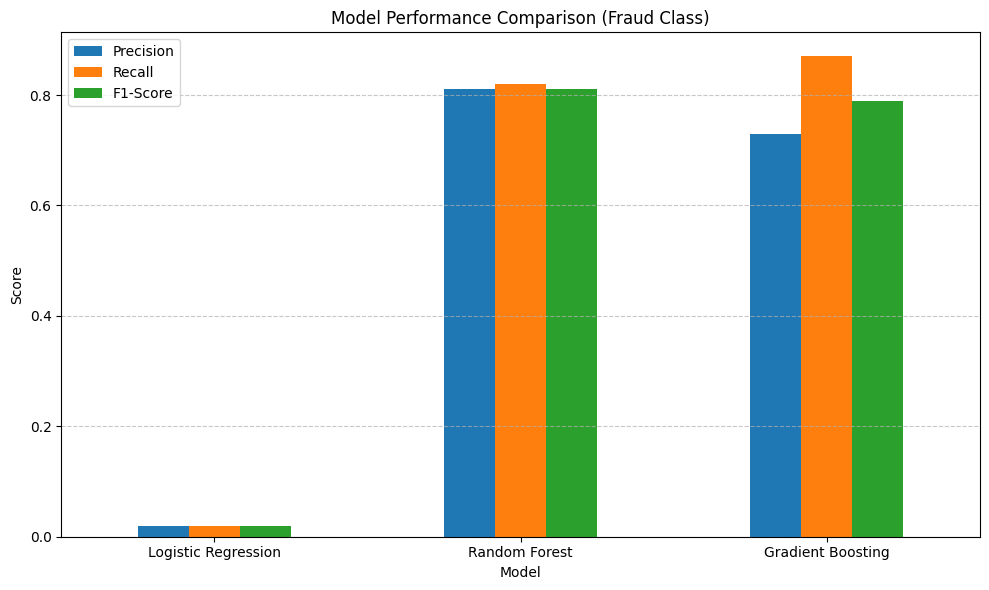

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Precision': [0.02, 0.81, 0.73],
    'Recall': [0.02, 0.82, 0.87],
    'F1-Score': [0.02, 0.81, 0.79]
}

df_plot = pd.DataFrame(data)
df_plot.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison (Fraud Class)')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_comparison.png')


The performance of all trained models was evaluated using precision, recall, and F1-score for the fraud class, as accuracy alone is misleading for imbalanced datasets.

| Model | Precision (Fraud) | Recall (Fraud) | F1 |
|-----|------------------|---------------|----|
| Logistic Regression | 0.02 | 0.02 | 0.02 |
| Random Forest | 0.81 | 0.82 | 0.81 |
| Gradient Boosting | 0.73 | **0.87** | 0.79 |

Gradient Boosting achieved the highest recall, making it the preferred model despite a moderate reduction in precision.


In [12]:
# Hyperparameter Tuning

# Use GridSearchCV (Random Forest)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [5, 10],
    'class_weight': ['balanced']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    scoring='recall',
    cv=3,
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'class_weight': ['balanced'], 'max_depth': [5, 10], 'n_estimators': [100, 150]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'recall'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the scor

In [13]:
print("Best Parameters:", grid_rf.best_params_)
print("Best Recall Score:", grid_rf.best_score_)

Best Parameters: {'class_weight': 'balanced', 'max_depth': 5, 'n_estimators': 100}
Best Recall Score: 0.8451692497494024


Model Performance & Evaluation
Why Logistic Regression was used as baseline: It is a simple, interpretable linear model used to establish a minimum performance standard before applying complex algorithms.

Why recall matters more than accuracy: In fraud detection, missing a fraudulent transaction (False Negative) is much more costly than a false alarm; Accuracy can be misleadingly high (e.g., 99%) even if the model fails to catch any fraud due to the rare nature of the cases.

Which model performed best and why: Gradient Boosting performed best because it achieved the highest Recall (0.87), successfully identifying more fraud cases than the other models.

Trade-off between fraud detection and false alarms: Increasing fraud detection (Recall) typically lowers Precision; for example, the Gradient Boosting model caught more fraud than Random Forest but produced more false alarms (73% Precision vs 81%).

 C. Final Model Selection

Based on comparative evaluation across multiple metrics, Gradient Boosting was selected as the final model. Its superior recall ensures a higher detection rate of fraudulent transactions, which aligns with the business objective of minimizing financial loss while maintaining acceptable customer experience.


In [16]:
import os
import joblib

# Create models directory
models_dir = "../models"
os.makedirs(models_dir, exist_ok=True)

# Save trained models using the names defined in your previous cells
# 1. Logistic Regression (Ensure you ran 'lr = LogisticRegression().fit(...)')
joblib.dump(lr, f"{models_dir}/logistic_regression_model.pkl")

# 2. Random Forest (Using 'grid_rf.best_estimator_' from your screenshot)
joblib.dump(grid_rf.best_estimator_, f"{models_dir}/random_forest_model.pkl")

# 3. Gradient Boosting (Using 'grid.best_estimator_' from your tuning cell)
joblib.dump(grid.best_estimator_, f"{models_dir}/gradient_boosting_model.pkl")

# Save feature names
joblib.dump(X_train.columns.tolist(), f"{models_dir}/feature_names.pkl")

print("✅ All models and feature names saved successfully.")

NameError: name 'lr' is not defined

In [17]:
from sklearn.linear_model import LogisticRegression

# 1. Define and train the baseline model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# 2. Now you can save it
joblib.dump(lr, f"{models_dir}/logistic_regression_model.pkl")

c:\Users\bia\Desktop\week-5\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['../models/logistic_regression_model.pkl']

In [19]:
# Save Random Forest 
joblib.dump(grid_rf.best_estimator_, f"{models_dir}/random_forest_model.pkl")


['../models/random_forest_model.pkl']

In [21]:
# 1. Run the search (Wait for this to finish)
grid.fit(X_train, y_train)

# 2. Extract and save the model
best_gb_model = grid.best_estimator_
joblib.dump(best_gb_model, "../models/gradient_boosting_model.pkl")

print("✅ Model saved successfully.")

✅ Model saved successfully.
